<b>ML1.1 Парная регрессия<br>
ПИ19-3 Деменчук Георгий</b>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысл).

Импортируем данные

In [2]:
mvid = pd.read_csv("./data/MVID_101001_171001.txt")
sber = pd.read_csv("./data/SBER_101001_171001.txt")

Смотрим на структуру данных

In [3]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [4]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


Смотрим, чтоб не было null-значений

In [5]:
mvid.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

In [6]:
sber.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64

Все вместе соединяем в одну таблицу

In [7]:
data = mvid.merge(sber, on="<DATE>")

In [8]:
data.shape

(1758, 11)

In [9]:
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,MVID,D,20101001,0,194.38,19406,SBER,D,0,89.09,332429890
1,MVID,D,20101004,0,190.00,31039,SBER,D,0,89.88,194032721
2,MVID,D,20101005,0,187.00,17651,SBER,D,0,91.97,198775753
3,MVID,D,20101006,0,190.04,36482,SBER,D,0,91.20,210406027
4,MVID,D,20101007,0,199.85,204248,SBER,D,0,90.40,145137617


Выделяем Y для каждой акции

In [10]:
Y_mvid = data["<CLOSE>_x"]
Y_sber = data["<CLOSE>_y"]

Выделяем X для каждой акции

In [11]:
X_mvid = mvid.drop("<CLOSE>", axis=1)
X_sber = sber.drop("<CLOSE>", axis=1)

Выводим отфильтрованные данные

In [12]:
X_mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,MVID,D,20101001,0,19406
1,MVID,D,20101004,0,31039
2,MVID,D,20101005,0,17651
3,MVID,D,20101006,0,36482
4,MVID,D,20101007,0,204248


In [13]:
X_sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,SBER,D,20101001,0,332429890
1,SBER,D,20101004,0,194032721
2,SBER,D,20101005,0,198775753
3,SBER,D,20101006,0,210406027
4,SBER,D,20101007,0,145137617


2. Построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [14]:
class MyRegression:
    
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        """Метод для предсказания результата по фактору"""
        return self.b0 + self.b1 * x

    def error(self, X, Y):  
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
        
    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps = 5000):
        """Метод градиентного спуска"""
        steps, errors = [], []
        dJ = 1
        step = 0
        
        #Ошибки
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        
        #Специальные ограничения, чтоб вечно не обучалось
        while dJ > accuracy and (step < max_steps):
            
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            #Новая ошибка становится старой
            old_err = new_err
            new_err = self.error(X, Y)
            
            # Обновляем dj, как флаг выхода из цикла
            dJ = abs(old_err - new_err)
            
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

# SBER x MVID

Смотрим, можно ли вообще использовать линейную регрессию тут

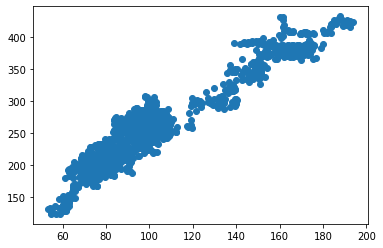

In [15]:
plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.show()

Использовать можно, примерно виден тренд. Создаем объект модели

In [16]:
model = MyRegression()

Попробуем построить без обучения

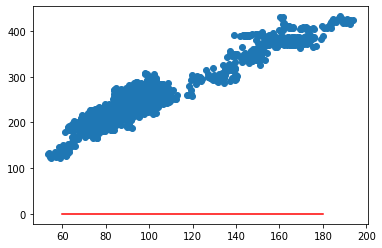

In [17]:
X0 = np.linspace(60, 180, 100)
Y0 = model.predict(X0)
plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, 'r')
plt.show()

Все логично, что без обучения оно не подберет оптимальные коэффы. Обучаем

In [18]:
steps, errors = model.BGD_new(Y_sber, Y_mvid)
model.predict(Y_sber)

0       222.132656
1       224.102184
2       229.312709
3       227.393042
4       225.398583
           ...    
1753    480.041161
1754    482.933126
1755    478.595178
1756    479.517615
1757    481.187975
Name: <CLOSE>_y, Length: 1758, dtype: float64

3. Оценить на графике качество построенной модели.

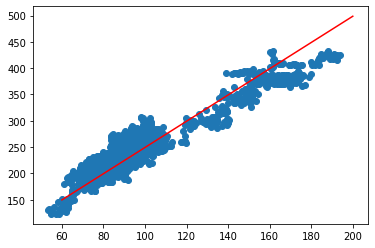

In [19]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, "r")
plt.show()

In [20]:
print(f"{model.error(Y_sber, Y_mvid)=}")

model.error(Y_sber, Y_mvid)=298.76881676471504


4. Построить кривые обучения.

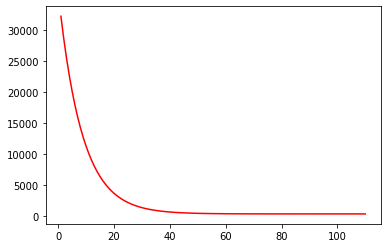

In [21]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()

## Дополнительные задания


1. Постройте модель регрессии на другой паре инструментов.

# SIBN x ROSN

In [22]:
sibn = pd.read_csv("./data/SIBN_210101_211231.txt")
rosn = pd.read_csv("./data/ROSN_210101_210228.txt")

Посмотрим то, что из себя представляют df

In [23]:
sibn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,SIBN,D,20210104,0,322.75
1,SIBN,D,20210105,0,323.90
2,SIBN,D,20210106,0,326.70
3,SIBN,D,20210108,0,337.00
4,SIBN,D,20210111,0,334.30


In [24]:
rosn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,ROSN,60,20210104,110000,438.25
1,ROSN,60,20210104,120000,436.60
2,ROSN,60,20210104,130000,436.75
3,ROSN,60,20210104,140000,436.85
4,ROSN,60,20210104,150000,436.90


Смотрим, чтоб не было пустых значений

In [25]:
sibn.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
dtype: int64

In [26]:
rosn.isna().sum()

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
dtype: int64

Мерджим данные

In [27]:
data = sibn.merge(rosn, on="<DATE>")

In [28]:
data.shape

(536, 9)

In [29]:
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y
0,SIBN,D,20210104,0,322.75,ROSN,60,110000,438.25
1,SIBN,D,20210104,0,322.75,ROSN,60,120000,436.60
2,SIBN,D,20210104,0,322.75,ROSN,60,130000,436.75
3,SIBN,D,20210104,0,322.75,ROSN,60,140000,436.85
4,SIBN,D,20210104,0,322.75,ROSN,60,150000,436.90


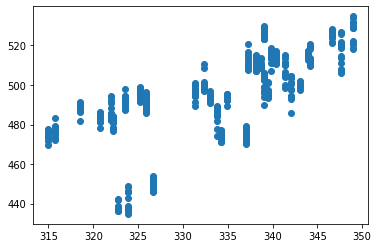

In [30]:
x = data['<CLOSE>_x']
y = data['<CLOSE>_y']

plt.figure()
plt.scatter(x, y)
plt.show()

In [31]:
model = MyRegression()
steps, errors = model.BGD_new(x, y)
print(f"Ошибка: {model.error(x, y)}")

Ошибка: 117.1809865016161


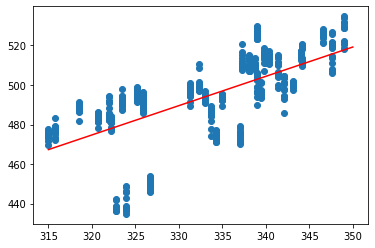

In [32]:
X01 = np.linspace(315, 350, 35)
Y01 = model.predict(X01)

plt.figure()
plt.scatter(x, y)
plt.plot(X01, Y01, 'r')
plt.show()

Строим кривые обучения

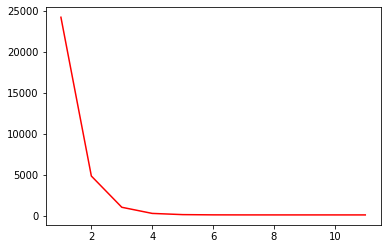

In [33]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()

2. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке. 

In [34]:
class MyRegression:
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
        #Поля для хранения данных выборок
        self.test_X = []
        self.train_X = []
        self.test_Y = []
        self.train_Y = []
        
    def get_selections(self, X, Y):
        self.train_X = X.sample(frac=0.8, random_state=10)
        self.test_X = X.drop(self.train_X.index)
        self.train_Y = Y[self.train_X.index]
        self.test_Y = Y.drop(self.train_Y.index)
        

    def predict(self, x):
        """Метод для предсказания результата по фактору"""
        return self.b0 + self.b1 * x

    def error(self, X, Y):  
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps = 5000):
        """Кастомная реализация метода градиентного спуска"""
        #Записываем данные в поля
        self.get_selections(X, Y)
        
        #Кол-во шагов
        step = 0
        
        steps, errors_train, errors_test = [], [], []
        
        #Вычисляем начальные значения ошибок для тренировочных данных
        old_train_err = self.error(self.train_X, self.train_Y)
        new_train_err = self.error(self.train_X, self.train_Y) - 1
        
        #Вычисляем начальные значения ошибок для тестовых данных
        old_test_err = self.error(self.test_X, self.test_Y)
        new_test_err = self.error(self.test_X, self.test_Y) - 1
        
        #Начальные значения dj
        dJ_train = 1
        dJ_test = 1
        
        #Специальные ограничения, чтоб вечно не обучалось
        while dJ_train > accuracy and (dJ_test > accuracy) and (step < max_steps):
            
            dJ0 = sum(self.predict(self.train_X) - self.train_Y) /len(self.train_X)
            dJ1 = sum((self.predict(self.train_X) - self.train_Y) * self.train_X) /len(self.train_X)
            
            #Обновляем коэффы
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            
            #Обновялем ошибку по тренировочным данным
            old_train_err = new_train_err
            new_train_err = self.error(self.train_X, self.train_Y)
            dJ_train = old_train_err - new_train_err 
            
            #Обновялем ошибку по тестовым данным
            old_test_err = new_test_err
            new_test_err = self.error(self.test_X, self.test_Y)
            dJ_test = old_test_err - new_test_err 
            
            #Инкремент +1 под шаг
            step += 1            
            steps.append(step)
            
            #Закидываем ошибку в список ошибок для дальнейшего формирования графика
            errors_train.append(new_train_err)
            errors_test.append(new_test_err)

        return steps, errors_train, errors_test

In [35]:
model = MyRegression()
steps, errors_train, errors_test = model.BGD_new(x, y)
print(f"Ошибка: {model.error(x, y)}")

Ошибка: 117.18091783882458


Динамика ошибки для тренировочной выборки

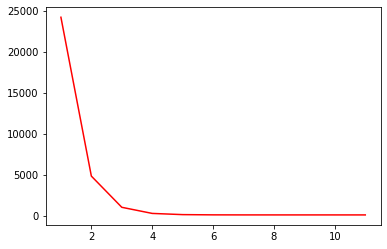

In [36]:
plt.figure()
plt.plot(steps, errors_train, 'r')
plt.show()

Динамика ошибки для тестовой выборке

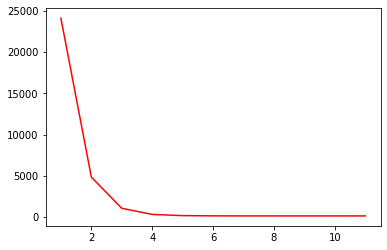

In [37]:
plt.figure()
plt.plot(steps, errors_test, 'r')
plt.show()

3. Научиться использовать библиотеку sklearn для построения парной линейной регрессии

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
X_train = np.array(x).reshape(-1, 1)

In [40]:
y_train = np.array(y).reshape(-1, 1)

In [41]:
linr = LinearRegression().fit(X_train, y_train)
linr.score(X_train, y_train)

0.4855636662529318

In [42]:
print(f"b0: {linr.coef_[0][0]}\nb1: {linr.intercept_[0]}")

b0: 1.6273744108996568
b1: -47.953701374874925
